<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/multinomial_logistic_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Logistic Regression in Numpy

This notebook contains the code for multiple classes also known as ONE Vs ALL Classification based on logistic regression using python and numpy. We are using matplotlib plotting library to visualize the data and our cost values.

The inputs is a randomly generated values which is present in the data folder. It contains 2 files train.csv for training and test.csv for testing our model. The output consist of 3 classes.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as  plt

### Load training data

In [3]:
#load data as numpy array using genfromtxt
train_data = np.genfromtxt('https://drive.google.com/uc?id=1vJwVLSGvbSK1kE8n2RNifUxCVMWu6PmY', delimiter=',', skip_header=1)

#no of samples
m = train_data.shape[0]

#input(Features) last column is the output column so slicing the train_data based on that
X = train_data[:,:-1]

#As we are using vector implementation adding a column in X with all the value 1
X = np.hstack((np.ones((m,1)),X))

#output
y = train_data[:,-1:]

In [8]:
print(X[0:3,])
print(y[0:3,])
print(X.shape,y.shape)

[[ 1.   22.63 61.39]
 [ 1.   99.38 27.28]
 [ 1.   94.32 66.42]]
[[0.]
 [1.]
 [2.]]
(100, 3) (100, 1)


Since we have 3 classes we will design 3 model one for classifying each classes. So for easier computation we will convert our output vector in matrix where no of columns is equal to the no of classes. The values in the matrix will be 0 or 1. For instance the rows where we have output 2 the column 2 will contain 1 and rest all 0 .

In [9]:
#For multi class classification we uses the concept of one vs all
#as we have 3 classes so y will be of shape m,3
Y = np.zeros((m,3))

#no of classes
k = np.unique(y)
k.sort()

#in Y matrix for each class columns put 1 wherin the rows belong to that class
for cls in k.astype(int):
    Y[np.where(y[:,-1] == cls),cls] = 1

In [19]:
print(k)
print(Y[0:5,])

[0. 1. 2.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


### Visualize data
There are 2 features lets plot them as x,y with features belonging to class 0 as red and class 1 as green and class 2 as blue

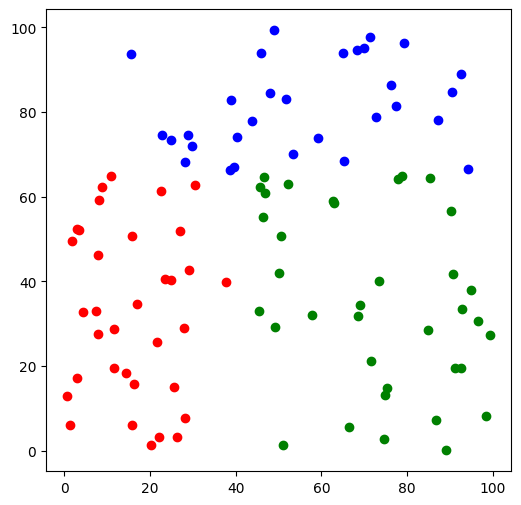

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(X[y[:,0] == 0][:,1], X[y[:,0] == 0][:,2], label='class 0', c='r')
plt.scatter(X[y[:,0] == 1][:,1], X[y[:,0] == 1][:,2], label='class 1', c='g')
plt.scatter(X[y[:,0] == 2][:,1], X[y[:,0] == 2][:,2], label='class 2', c='b')

plt.show()

### Logistic Regression Implementation
For multi-class logistic regression we have 3 models so our theta will be of shape (3,3) and cost arr of shape (no_of_iterations,3) one for each model

In [13]:
#define theta with size 3,3 as there are 3 features and 3 models, lets take the initial value as 0
theta = np.zeros((3,3))

#learning rate
learning_rate = 0.001

#no of iterations we want our model to be trained
no_of_iterations = 200000

#to visualise the cost function
cost_arr = np.empty((0,3))

#counter
i = 1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(no_of_iterations):

    #model/hypothesis function
    lineq = np.dot(X, theta.T)
    h = sigmoid(lineq)

    #cost function -1/m * sum (y log h + (1-y)log(1-h))for each class
    cost = -1/m * ((Y * np.log(h)) + ((1-Y) * np.log(1-h)))
    cost = cost.sum(axis = 0)
    cost_arr = np.vstack((cost_arr, cost))

    #applying gradient descent to calculate new theta = theta - (learning_rate/m * summation[(h-y)*x]) -> delta
    #summation can be replace by matrix multiplication
    delta = (learning_rate/m) * np.dot((h-Y).T, X)
    theta = theta - delta

    i = i + 1;

In [16]:
print(theta)

[[ 6.40021736e+00 -1.39447586e-01 -4.78757962e-02]
 [-2.07444826e+00  8.94816188e-02 -6.49579515e-02]
 [-7.54354414e+00 -5.06823544e-03  1.17747915e-01]]


### Plot cost values

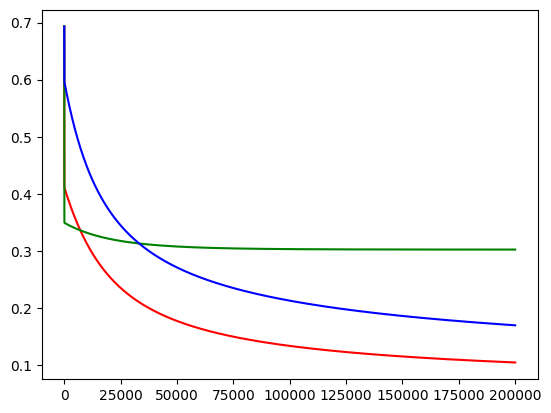

In [14]:
plt.plot(cost_arr[:,0], label='class 0', c='r')
plt.plot(cost_arr[:,1], label='class 1', c='g')
plt.plot(cost_arr[:,2], label='class 2', c='b')
plt.show()

### Plot the decision boundary line
only need 2 points to define the line lets take min and max of feature 1 and calculate feature 2 based on the theta values we have

y = theta0 + theta1x1 + theta2x2, since y is 3rd dimension take y as 0 and calculate x2 to plot the decision boundary line

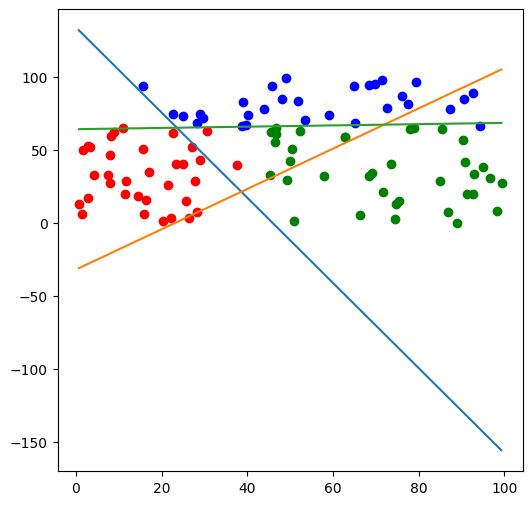

In [15]:
 #plot the decision boundary line
plot_x = np.array([min(X[:,1]),max(X[:,2])])
plot_y0 = -1/theta[0,2] * ((theta[0,1] * plot_x) + theta[0,0])
plot_y1 = -1/theta[1,2] * ((theta[1,1] * plot_x) + theta[1,0])
plot_y2 = -1/theta[2,2] * ((theta[2,1] * plot_x) + theta[2,0])

plt.figure(figsize=(6,6))
plt.scatter(X[y[:,0] == 0][:,1], X[y[:,0] == 0][:,2], label='class 0', c='r')
plt.scatter(X[y[:,0] == 1][:,1], X[y[:,0] == 1][:,2], label='class 1', c='g')
plt.scatter(X[y[:,0] == 2][:,1], X[y[:,0] == 2][:,2], label='class 2', c='b')
plt.plot(plot_x,plot_y0)
plt.plot(plot_x,plot_y1)
plt.plot(plot_x,plot_y2)
plt.show()

### Prediction on test data

Our model is ready lets apply it on test data.

lets define the predict array with 0 and update 1 for the inputs where the sigmoid value is greater than 0.5

In [17]:
#load test data as numpy array using genfromtxt
test_data = np.genfromtxt('https://drive.google.com/uc?id=1j4euqcEGkQfVZEzNOA0_3qblEI9vx6Hp', delimiter=',', skip_header=1)

#no of test samples
test_m = test_data.shape[0]

#test input(Features)
test_X = test_data[:,:-1]

#As we are using vector implementation adding a column in test_X with all the value 1
test_X = np.hstack((np.ones((test_m,1)),test_X))

#test output
test_y = test_data[:,-1:]

#predict
pred = np.zeros((test_m,3))
model_predict = sigmoid(np.dot(test_X, theta.T))
pred[model_predict > 0.5] = 1

#converting the prediction matrix into vectors
predict = np.zeros((test_m,1))
predict[pred[:,1] == 1] = 1
predict[pred[:,2] == 1] = 2

### Comparing our model with scikit library

Lets compare our model with the scikit logistic model. we have used mean square error and variance values for model comparison.


In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score

#train the model with training data
regr = linear_model.LogisticRegression()
regr.fit(X,y.reshape(m))

#Predict our test data
sklearn_predict = regr.predict(test_X)

print('Sklearn')
#coefficients
print('Coefficients: {}'.format(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(sklearn_predict, test_y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(test_y, sklearn_predict))

print('\n')

print('Our Model')
#coefficients
print('Coefficients: {}'.format(theta))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(predict, test_y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(test_y, predict))


Sklearn
Coefficients: [[-0.18774773 -0.46554499 -0.4969975 ]
 [-0.13989579  0.24938487 -0.3334608 ]
 [ 0.32764352  0.21616012  0.8304583 ]]
Mean squared error: 0.00
Variance score: 1.00


Our Model
Coefficients: [[ 6.40021736e+00 -1.39447586e-01 -4.78757962e-02]
 [-2.07444826e+00  8.94816188e-02 -6.49579515e-02]
 [-7.54354414e+00 -5.06823544e-03  1.17747915e-01]]
Mean squared error: 0.16
Variance score: 0.76


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It seems our model mean squared error and variance is much better than sklearn model.